In [1]:
import pandas as pd
from tqdm import tqdm

# Read the CSV file
df = pd.read_csv("public_data/wi_dataset.csv")

# Extract the desired columns
columns = ["id", "title", "description"]
df_subset = df[columns]
# Drop duplicates
df_subset.drop_duplicates(subset="description", inplace=True)
# Drop rows with missing values
df_subset.dropna(inplace=True)

In [7]:
!pip install langdetect matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 28.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 28.1 MB/s eta 0:00:00


In [4]:
from langdetect import detect
# Create an empty list to store the detected languages
languages = []

# Iterate over each description in the dataset
for description in tqdm(df_subset["description"]):
    try:
        # Detect the language of the description
        language = detect(description)
        
        # Add the detected language to the list
        languages.append(language)      
    except:
        # Handle any errors that occur during language detection
        print("Error detecting language")

# Count the occurrences of each language
language_counts = pd.Series(languages).value_counts()

# List the unique languages
unique_languages = language_counts.index.tolist()

# Print the language counts and unique languages
print("Language Counts:")
print(language_counts)
print("Unique Languages:")
print(unique_languages)


  1%|▏         | 358/25080 [00:01<01:16, 321.14it/s]

Error detecting language


100%|██████████| 25080/25080 [01:20<00:00, 310.12it/s]

Language Counts:
en    19711
pl      581
it      549
bg      504
de      478
ro      427
sl      320
hu      207
pt      207
nl      204
fr      201
cs      200
sv      199
es      198
et      196
sk      166
lt      160
el      158
fi      136
lv       97
hr       84
da       76
ru        9
ca        8
vi        1
cy        1
af        1
Name: count, dtype: int64
Unique Languages:
['en', 'pl', 'it', 'bg', 'de', 'ro', 'sl', 'hu', 'pt', 'nl', 'fr', 'cs', 'sv', 'es', 'et', 'sk', 'lt', 'el', 'fi', 'lv', 'hr', 'da', 'ru', 'ca', 'vi', 'cy', 'af']


<Axes: >

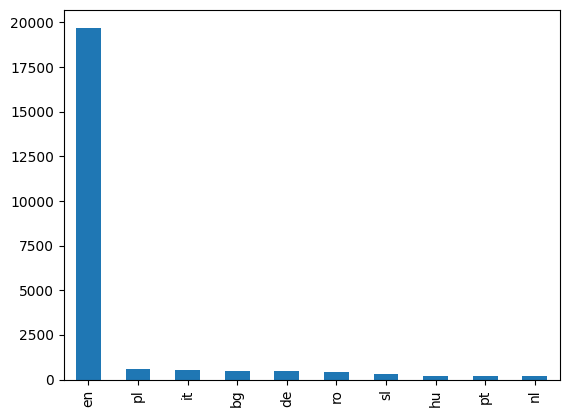

In [9]:
language_counts[:10].plot(kind='bar')

In [14]:
!pip install wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 42.4 MB/s eta 0:00:00


<Axes: xlabel='title'>

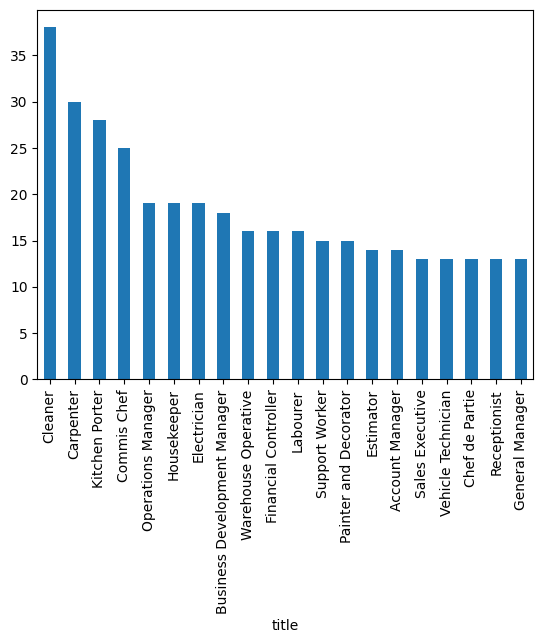

In [18]:
duplicate_job_titles = df_subset["title"][df_subset["title"].duplicated()].value_counts()
duplicate_job_titles[:20].plot(kind='bar')

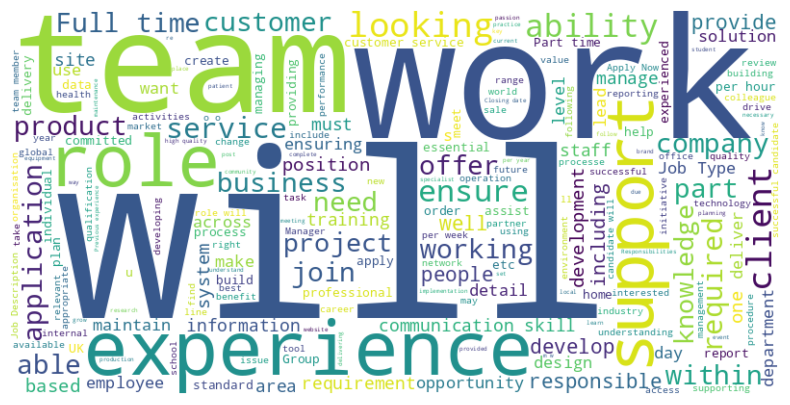

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
text = " ".join(description for description in df_subset["description"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()
